In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from matplotlib import rcParams

In [2]:
#import the necessary modelling algos.

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split,cross_validate

#preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder

#evaluation metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

In [3]:
names = ["Age", "WorkClass", "fnlwgt", "Education", "EducationNum","MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
         "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"]

test = pd.read_csv("Adult_test.csv", names = names)
train = pd.read_csv("Adult_train.csv",names = names )



data = pd.concat([train,test])
data.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [4]:
data.isnull().sum()

Age              0
WorkClass        1
fnlwgt           1
Education        1
EducationNum     1
MaritalStatus    1
Occupation       1
Relationship     1
Race             1
Gender           1
CapitalGain      1
CapitalLoss      1
HoursPerWeek     1
NativeCountry    1
Income           1
dtype: int64

In [5]:
data = test.dropna()
data.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [6]:
print(data.columns)

Index(['Age', 'WorkClass', 'fnlwgt', 'Education', 'EducationNum',
       'MaritalStatus', 'Occupation', 'Relationship', 'Race', 'Gender',
       'CapitalGain', 'CapitalLoss', 'HoursPerWeek', 'NativeCountry',
       'Income'],
      dtype='object')


###  Finding No. of Unique Terms in data set  

In [7]:
data.nunique(axis='rows')

Age                 73
WorkClass            9
fnlwgt           12787
Education           16
EducationNum        16
MaritalStatus        7
Occupation          15
Relationship         6
Race                 5
Gender               2
CapitalGain        113
CapitalLoss         82
HoursPerWeek        89
NativeCountry       41
Income               2
dtype: int64

## Data Cleaning 

### WorkClass

In [8]:
data.WorkClass.unique()

array([' Private', ' Local-gov', ' ?', ' Self-emp-not-inc',
       ' Federal-gov', ' State-gov', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

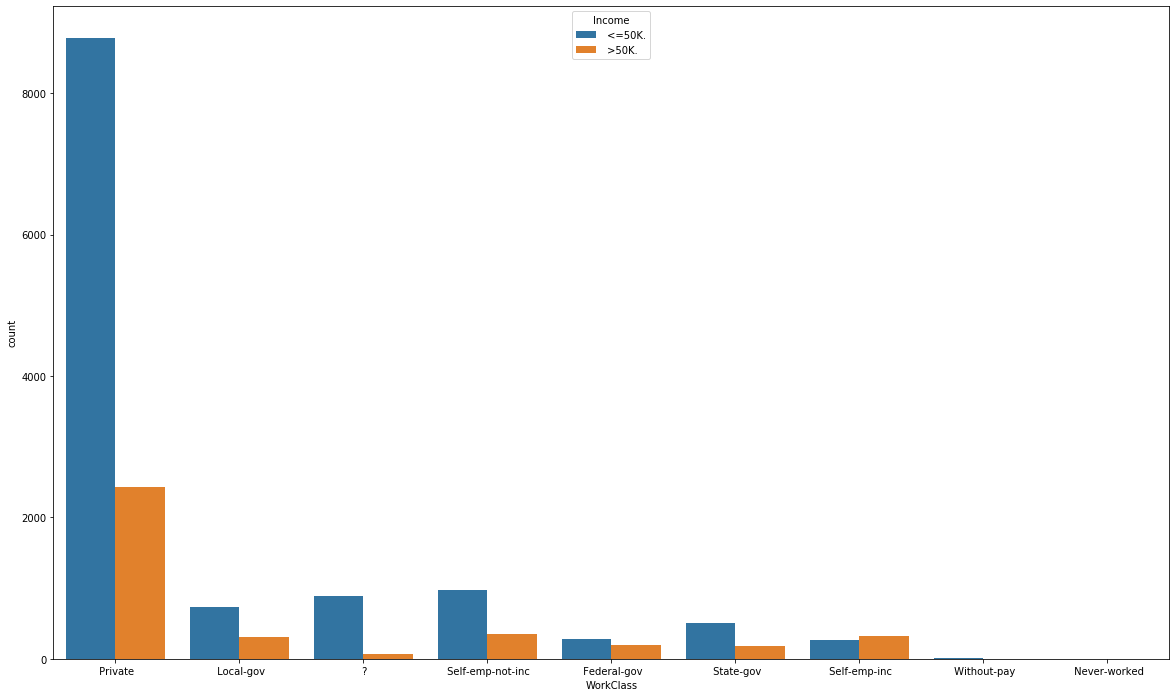

In [9]:
plt.figure(figsize=(20,12)) # this creates a figure 20 inch wide, 12 inch high
sns.countplot(x = 'WorkClass', hue = 'Income', data = data)


removing ?, Without_pay and Never-worked

In [10]:
data = data.drop(data[data['WorkClass'] == ' ?'].index)
data = data.drop(data[data['WorkClass'] == ' Without-pay'].index)
data = data.drop(data[data['WorkClass'] == ' Never-worked'].index)

In [11]:
data.WorkClass.unique()

array([' Private', ' Local-gov', ' Self-emp-not-inc', ' Federal-gov',
       ' State-gov', ' Self-emp-inc'], dtype=object)

### Education 

In [12]:
data.Education.unique()

array([' 11th', ' HS-grad', ' Assoc-acdm', ' Some-college', ' 10th',
       ' Prof-school', ' 7th-8th', ' Bachelors', ' Masters', ' Doctorate',
       ' 5th-6th', ' Assoc-voc', ' 9th', ' 12th', ' 1st-4th',
       ' Preschool'], dtype=object)

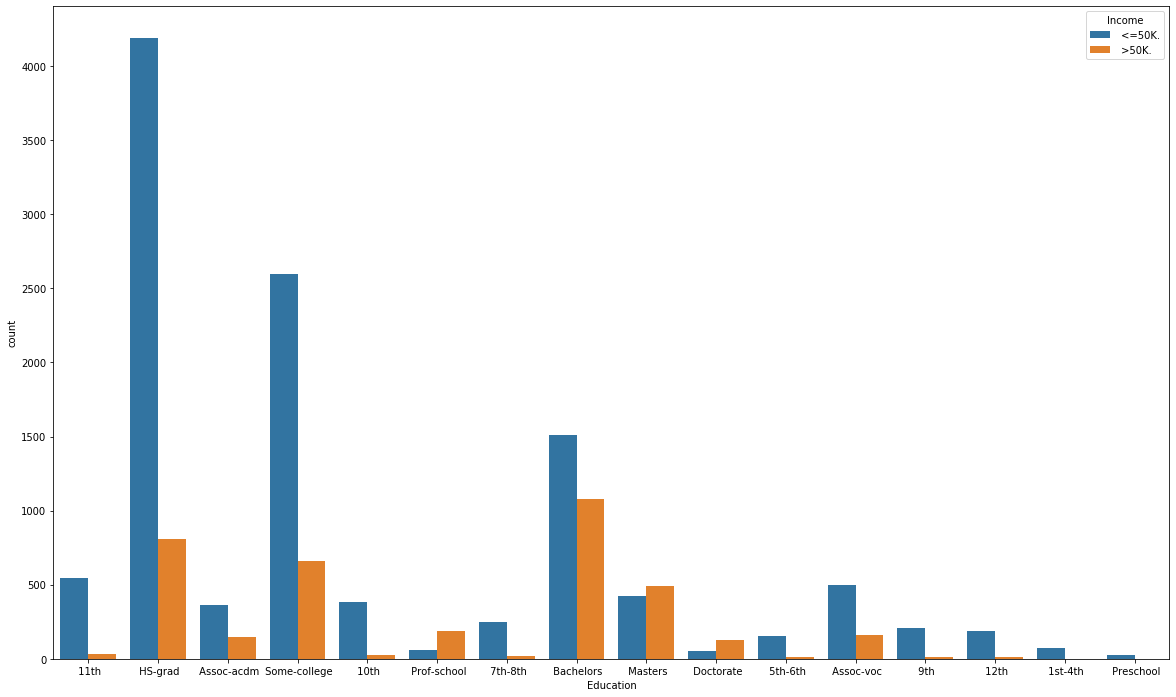

In [13]:
plt.figure(figsize=(20,12)) # this creates a figure 20 inch wide, 12 inch high
sns.countplot(x = 'Education', hue = 'Income', data = data)

renaming pre-school to 12th as school

In [14]:
data['Education'].replace([' 11th',' 10th',' 7th-8th',' 5th-6th', ' 9th', ' 12th', ' 1st-4th',' Preschool'],' School',inplace=True)

In [15]:
data['Education'].value_counts()

 HS-grad         4999
 Some-college    3261
 Bachelors       2590
 School          1948
 Masters          915
 Assoc-voc        657
 Assoc-acdm       508
 Prof-school      252
 Doctorate        178
Name: Education, dtype: int64

### EducationNum

In [16]:
data.EducationNum.unique()

array([ 7.,  9., 12., 10.,  6., 15.,  4., 13., 14., 16.,  3., 11.,  5.,
        8.,  2.,  1.])

**** Here EducationNum is same as the Education ,then we can drop anyone of them 

### MaritalStatus

In [17]:
data.MaritalStatus.value_counts()

 Married-civ-spouse       7107
 Never-married            4961
 Divorced                 2105
 Separated                 474
 Widowed                   456
 Married-spouse-absent     194
 Married-AF-spouse          11
Name: MaritalStatus, dtype: int64

### Occupation 

In [18]:
data['Occupation'].value_counts()

 Prof-specialty       2032
 Exec-managerial      2019
 Craft-repair         2013
 Sales                1853
 Adm-clerical         1841
 Other-service        1627
 Machine-op-inspct    1019
 Transport-moving      758
 Handlers-cleaners     701
 Tech-support          518
 Farming-fishing       494
 Protective-serv       334
 Priv-house-serv        93
 Armed-Forces            6
Name: Occupation, dtype: int64

In [19]:
data.columns

Index(['Age', 'WorkClass', 'fnlwgt', 'Education', 'EducationNum',
       'MaritalStatus', 'Occupation', 'Relationship', 'Race', 'Gender',
       'CapitalGain', 'CapitalLoss', 'HoursPerWeek', 'NativeCountry',
       'Income'],
      dtype='object')

In [20]:
data['Relationship'].value_counts()

 Husband           6297
 Not-in-family     4051
 Own-child         2178
 Unmarried         1596
 Wife               704
 Other-relative     482
Name: Relationship, dtype: int64

### Race

In [21]:
data['Race'].unique()

array([' Black', ' White', ' Asian-Pac-Islander', ' Other',
       ' Amer-Indian-Eskimo'], dtype=object)

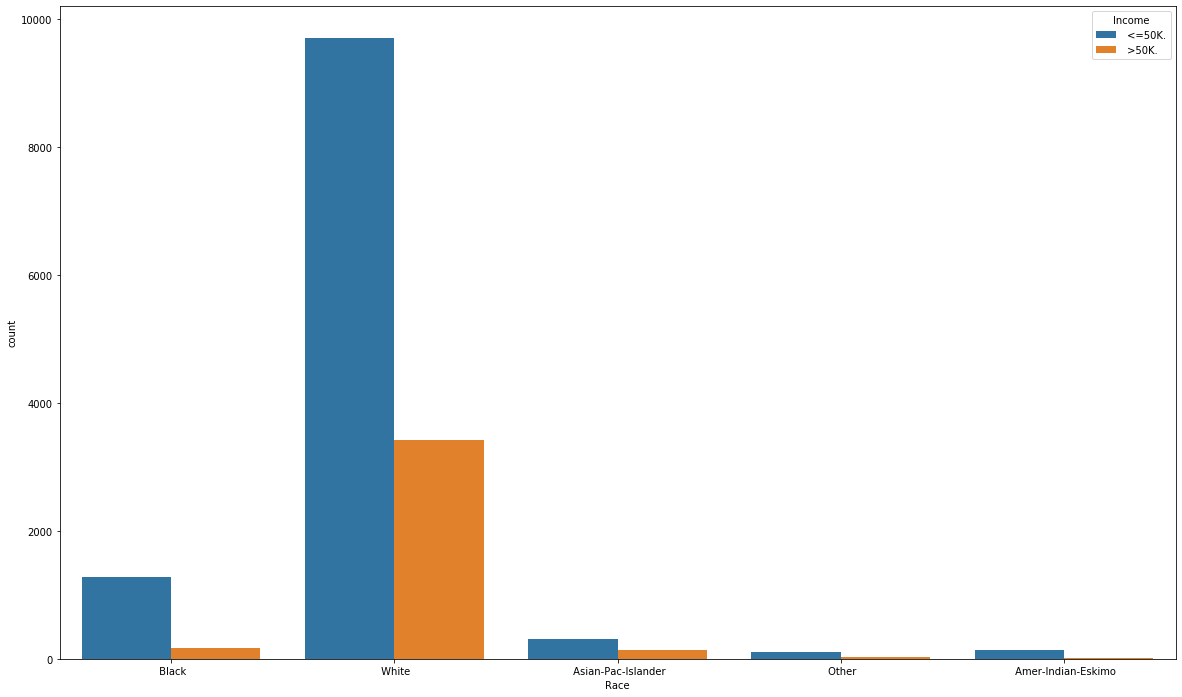

In [22]:
plt.figure(figsize=(20,12)) # this creates a figure 20 inch wide, 12 inch high
sns.countplot(x = 'Race', hue = 'Income', data = data)

** Here White In majority , replacing all other race into Other 

In [23]:
data['Race'].replace([' Black', ' Asian-Pac-Islander', ' Other',' Amer-Indian-Eskimo'], 'Other', inplace = True)
data['Race'].unique()

array(['Other', ' White'], dtype=object)

### Gender

In [24]:
data['Gender'].unique()

array([' Male', ' Female'], dtype=object)

### NativeCountry

In [25]:
Country_count = data['NativeCountry'].value_counts()
data['NativeCountry'].unique()

array([' United-States', ' ?', ' Peru', ' Guatemala', ' Mexico',
       ' Dominican-Republic', ' Ireland', ' Germany', ' Philippines',
       ' Thailand', ' Haiti', ' El-Salvador', ' Puerto-Rico', ' Vietnam',
       ' South', ' Columbia', ' Japan', ' India', ' Cambodia', ' Poland',
       ' Laos', ' England', ' Cuba', ' Taiwan', ' Italy', ' Canada',
       ' Portugal', ' China', ' Nicaragua', ' Honduras', ' Iran',
       ' Scotland', ' Jamaica', ' Ecuador', ' Yugoslavia', ' Hungary',
       ' Hong', ' Greece', ' Trinadad&Tobago',
       ' Outlying-US(Guam-USVI-etc)', ' France'], dtype=object)

Text(0.5, 1.0, 'Total adults from each Country')

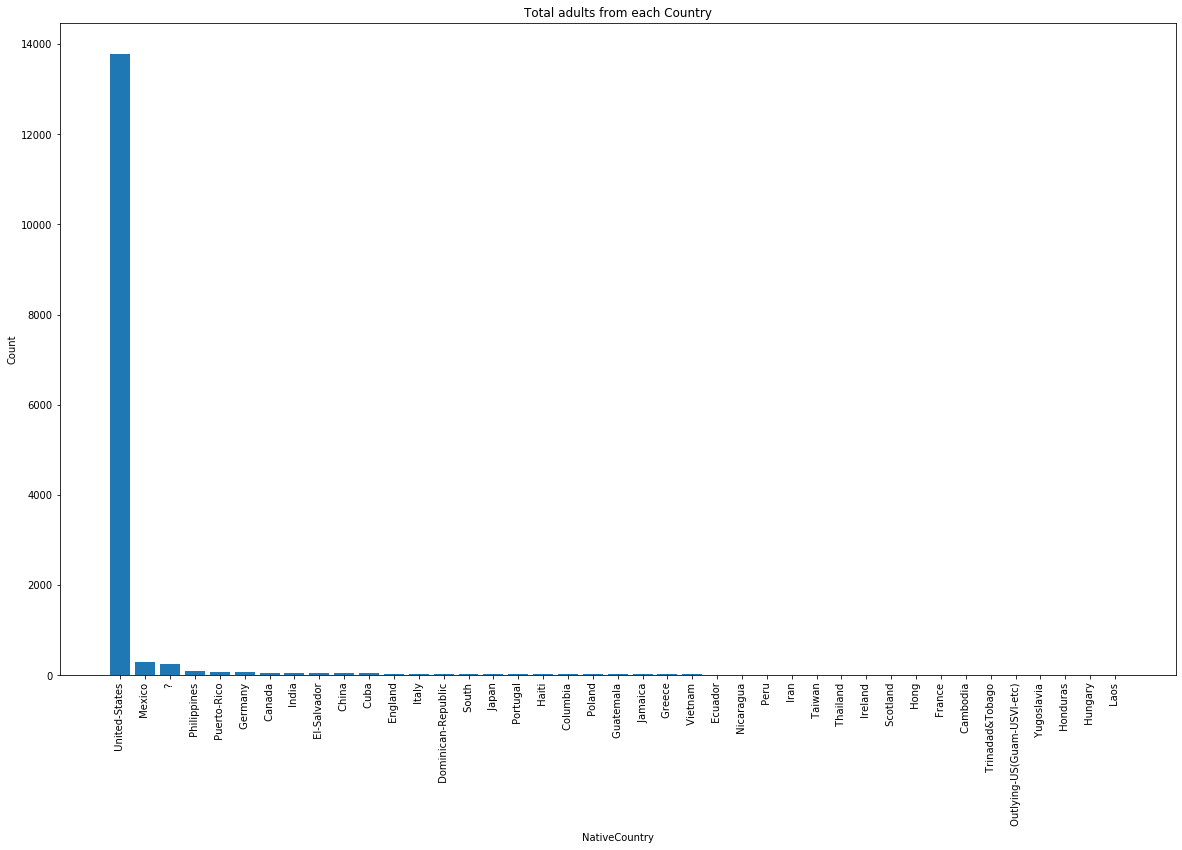

In [26]:
plt.figure(figsize=(20,12)) # this creates a figure 20 inch wide, 12 inch high

plt.bar(Country_count.index, Country_count.values)
plt.xticks(rotation = 90)
plt.xlabel('NativeCountry')
plt.ylabel('Count')
plt.title('Total adults from each Country')

**** Here Majority is United_states. replacing other countries as 'Other' and drop missing values '?'

In [27]:
data = data.drop(data[data['NativeCountry'] == ' ?'].index)


In [28]:
data['NativeCountry'].replace([ ' Peru', ' Guatemala', ' Mexico',
                                ' Dominican-Republic', ' Ireland', ' Germany', ' Philippines',
                                ' Thailand', ' Haiti', ' El-Salvador', ' Puerto-Rico', ' Vietnam',
                                ' South', ' Columbia', ' Japan', ' India', ' Cambodia', ' Poland',
                                ' Laos', ' England', ' Cuba', ' Taiwan', ' Italy', ' Canada',
                                ' Portugal', ' China', ' Nicaragua', ' Honduras', ' Iran',
                                ' Scotland', ' Jamaica', ' Ecuador', ' Yugoslavia', ' Hungary',
                                ' Hong', ' Greece', ' Trinadad&Tobago',
                                ' Outlying-US(Guam-USVI-etc)', ' France'], 'Others', inplace= True)
data['NativeCountry'].unique()

array([' United-States', 'Others'], dtype=object)

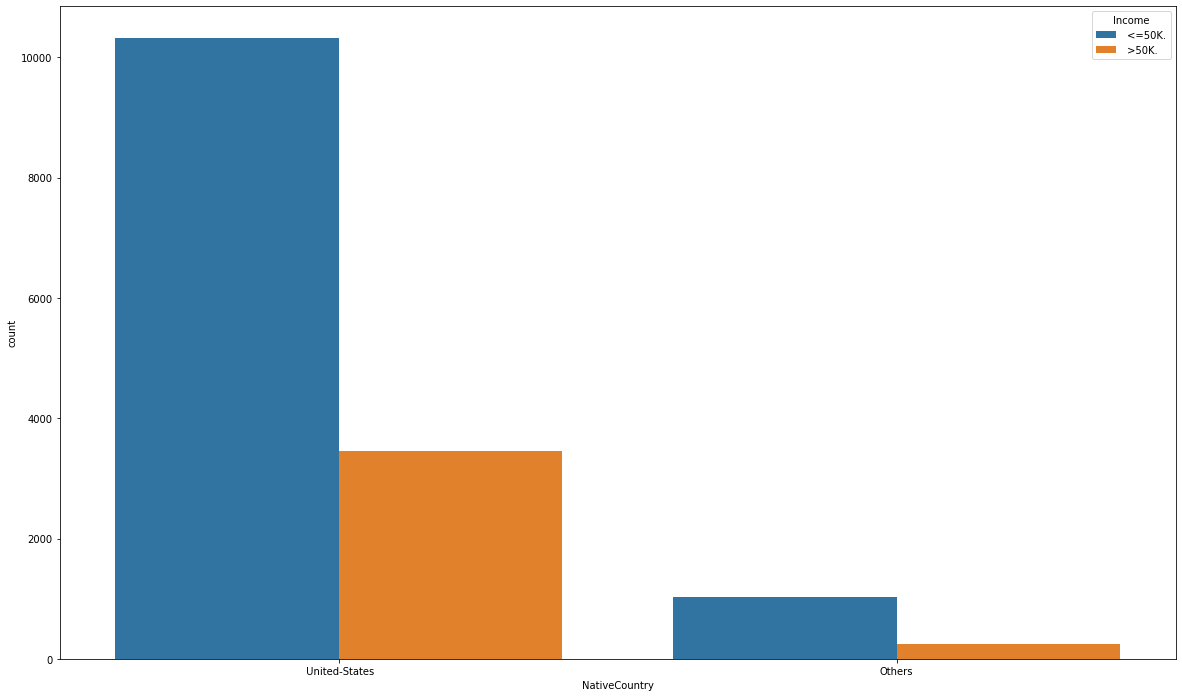

In [29]:
plt.figure(figsize=(20,12)) # this creates a figure 20 inch wide, 12 inch high
sns.countplot(x = 'NativeCountry', hue = 'Income', data = data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000269AEC9A048>,
      dtype=object)

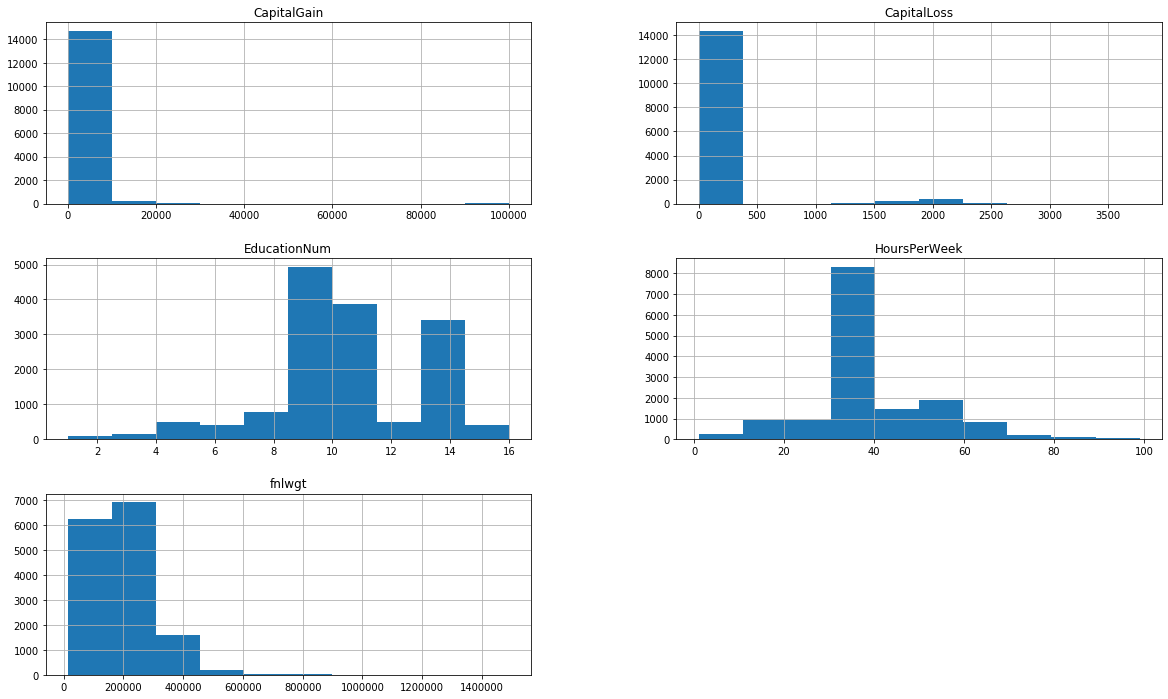

In [30]:
rcParams['figure.figsize'] = 20, 12
data[['Age', 'fnlwgt', 'EducationNum', 'CapitalGain', 'CapitalLoss', 'HoursPerWeek']].hist()

*** Going to group the Age column into bins.

*** For Capital Gain and Capital Loss the data is highly left skewed which needs to be tackled.

*** We need to analyse Education Number further as it might align with Education information.

*** Final Weight is also left skewed.

*** The Hours per Week can also be split into bins.

### AGE

In [31]:
data['Age'].value_counts().head()

35    444
33    442
36    431
31    423
38    420
Name: Age, dtype: int64

In [32]:
data['Age'].unique()

array(['25', '38', '28', '44', '34', '63', '24', '55', '65', '36', '26',
       '48', '43', '20', '37', '45', '22', '23', '54', '32', '46', '56',
       '17', '29', '39', '52', '18', '21', '42', '33', '30', '47', '41',
       '19', '69', '50', '31', '59', '49', '58', '40', '27', '57', '61',
       '51', '73', '53', '80', '62', '35', '72', '64', '68', '66', '60',
       '67', '71', '70', '90', '77', '81', '74', '78', '82', '75', '85',
       '76', '89', '83', '79', '88', '87', '84'], dtype=object)

In [33]:
data['Age'] = data['Age'].astype(int)

In [34]:
data['Age'].unique()

array([25, 38, 28, 44, 34, 63, 24, 55, 65, 36, 26, 48, 43, 20, 37, 45, 22,
       23, 54, 32, 46, 56, 17, 29, 39, 52, 18, 21, 42, 33, 30, 47, 41, 19,
       69, 50, 31, 59, 49, 58, 40, 27, 57, 61, 51, 73, 53, 80, 62, 35, 72,
       64, 68, 66, 60, 67, 71, 70, 90, 77, 81, 74, 78, 82, 75, 85, 76, 89,
       83, 79, 88, 87, 84], dtype=int64)

Here, I'll bucket the age into separate bins.

0-25: Young

25-50: Adult

50-100: Old

In [35]:
data['Age'] = pd.cut(data['Age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])


###  CapitalGain and CapitalLoss


In [36]:
data['CapitalDiff'] = data['CapitalGain']-data['CapitalLoss']

In [37]:
data['CapitalDiff'] = pd.cut(data['CapitalDiff'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])

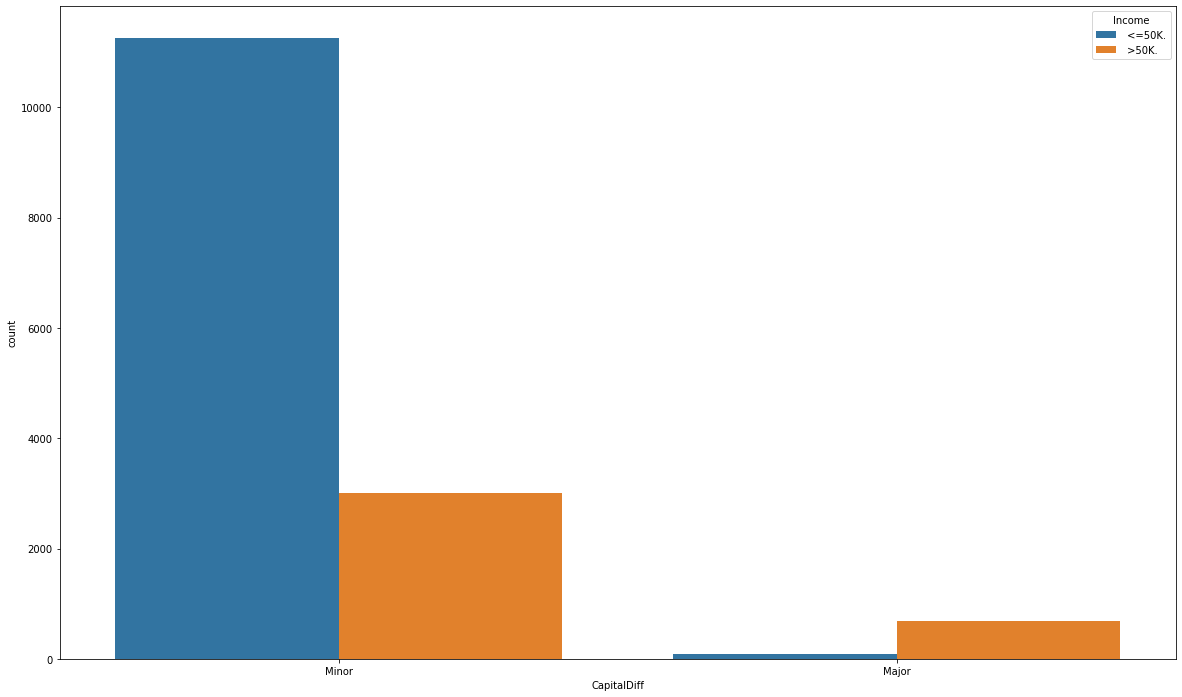

In [38]:
plt.figure(figsize=(20,12)) # this creates a figure 20 inch wide, 12 inch high
sns.countplot(x = 'CapitalDiff', hue = 'Income', data = data)

In [39]:
data.drop(['CapitalGain'], axis = 1, inplace = True)
data.drop(['CapitalLoss'], axis = 1, inplace = True)

## EducationNum

In [40]:
data.drop(['EducationNum'], axis = 1,inplace = True)

### Final Weight


In [41]:
data.drop(['fnlwgt'], axis = 1, inplace = True)

### Hours per week 

creating the buckets as 0-30, 30-40, and 40-100.

In [42]:
data['HoursPerWeek'].unique()

array([40., 50., 30., 32., 10., 39., 48., 25., 20., 47., 35., 43., 90.,
       54., 60., 38., 45., 36., 18., 24., 44., 56., 28., 16., 41., 22.,
       55., 14., 33., 37., 12., 70., 15., 75., 52., 84., 42., 80.,  8.,
       68., 99., 65., 17., 72., 53., 96., 21., 46.,  3.,  1., 49., 67.,
       76., 23.,  2., 58., 26., 34.,  4.,  7., 51., 78., 63.,  5., 31.,
       92., 77., 27., 29., 85.,  6., 13., 19., 98., 62., 66., 57., 86.,
       11., 59.,  9., 64., 73., 61., 88., 79., 89., 74., 69.])

In [43]:
data['HoursPerWeek'] = data['HoursPerWeek'].astype(int)

In [44]:
data['HoursPerWeek'] = pd.cut(data['HoursPerWeek'], bins = [0,30,40,100], labels = ['Lesser Hours', 'Normal Hours', 'Extra Hours'])

In [45]:
data.head()

,Age,WorkClass,Education,MaritalStatus,Occupation,Relationship,Race,Gender,HoursPerWeek,NativeCountry,Income,CapitalDiff
1,Young,Private,School,Never-married,Machine-op-inspct,Own-child,Other,Male,Normal Hours,United-States,<=50K.,Minor
2,Adult,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,Extra Hours,United-States,<=50K.,Minor
3,Adult,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,Normal Hours,United-States,>50K.,Minor
4,Adult,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Other,Male,Normal Hours,United-States,>50K.,Major
6,Adult,Private,School,Never-married,Other-service,Not-in-family,White,Male,Lesser Hours,United-States,<=50K.,Minor


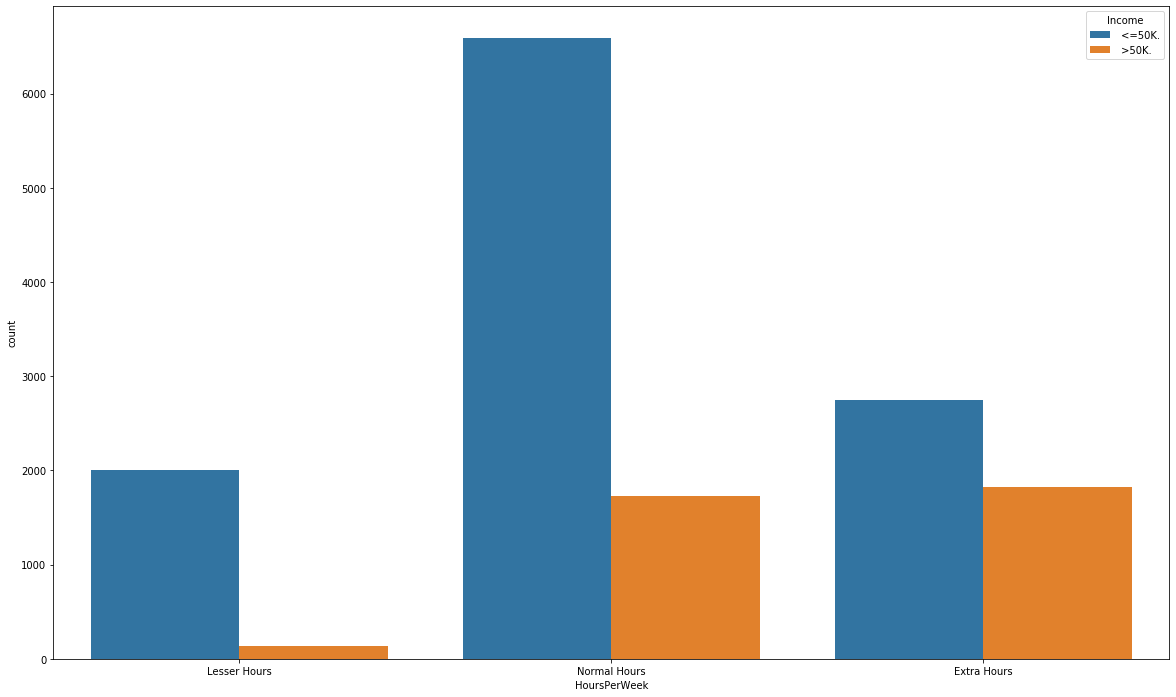

In [46]:
plt.figure(figsize=(20,12)) # this creates a figure 20 inch wide, 12 inch high
sns.countplot(x = 'HoursPerWeek', hue = 'Income', data = data)

### Income 

In [47]:
data.Income.unique()

array([' <=50K.', ' >50K.'], dtype=object)

In [48]:
data['Income'] = data['Income'].replace(' <=50K.', 0).replace(' >50K.' , 1)

In [49]:
data.Income.unique()

array([0, 1], dtype=int64)

### Splitting data

In [50]:
y = data['Income']
x = data.drop(['Income'], axis = 1)
x = pd.get_dummies(x)
print("Total features: {}".format(x.shape[1]))

Total features: 56


In [51]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.30, random_state = 0)


print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(10537, 56) (4516, 56) (10537,) (4516,)


### Applying Machine Learning Algorithms 

In [52]:
model = LogisticRegression()
model.fit(train_x, train_y)
pred = model.predict(test_x)

accuracy = accuracy_score(pred,test_y)*100
print('Accuracy :', accuracy )

Accuracy : 84.05668733392383


In [53]:
model = LinearSVC()
model.fit(train_x, train_y)
pred = model.predict(test_x)

accuracy = accuracy_score(pred,test_y)*100
print('Accuracy :', accuracy )

Accuracy : 84.18954827280778


In [54]:
model = KNeighborsClassifier()
model.fit(train_x, train_y)
pred = model.predict(test_x)

accuracy = accuracy_score(pred,test_y)*100
print('Accuracy :', accuracy )

Accuracy : 82.21877767936226


In [55]:
model = DecisionTreeClassifier()
model.fit(train_x, train_y)
pred = model.predict(test_x)

accuracy = accuracy_score(pred,test_y)*100
print('Accuracy :', accuracy )

Accuracy : 82.28520814880426


In [56]:
model = SVC(kernel='rbf')
model.fit(train_x, train_y)
pred = model.predict(test_x)

accuracy = accuracy_score(pred,test_y)*100
print('Accuracy :', accuracy )

Accuracy : 83.92382639503985


In [57]:
model = RandomForestClassifier()
model.fit(train_x, train_y)
pred = model.predict(test_x)

accuracy = accuracy_score(pred,test_y)*100
print('Accuracy :', accuracy )

Accuracy : 83.25952170062003


In [58]:
model = GradientBoostingClassifier()
model.fit(train_x, train_y)
pred = model.predict(test_x)

accuracy = accuracy_score(pred,test_y)*100
print('Accuracy :', accuracy )

Accuracy : 84.36669619131976


In [59]:
model = GaussianNB()
model.fit(train_x, train_y)
pred = model.predict(test_x)

accuracy = accuracy_score(pred,test_y)*100
print('Accuracy :', accuracy )

Accuracy : 79.80513728963685
